In [1]:
!pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import sklearn
from typing import Dict, Tuple
from scipy import stats
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

In [47]:
data = pd.read_csv('data/onlinefoods.csv', sep=",")

In [48]:
# размер набора данных
data.shape

(388, 13)

In [49]:
# типы колонок
data.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [50]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [51]:
# Первые 5 строк датасета
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [52]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 388


Так как пропусков нет, то этап заполнения пропусков можно пропустить.

## Кодирование категориальных признаков

In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
data_oe = data[['Family size', 'Feedback']]

In [55]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe)
cat_enc_oe

array([[3., 1.],
       [2., 1.],
       [2., 0.],
       [5., 1.],
       [3., 1.],
       [1., 1.],
       [2., 1.],
       [2., 1.],
       [1., 1.],
       [3., 1.],
       [4., 1.],
       [1., 0.],
       [4., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [1., 1.],
       [2., 0.],
       [3., 0.],
       [0., 1.],
       [2., 1.],
       [3., 1.],
       [3., 1.],
       [3., 1.],
       [2., 1.],
       [2., 1.],
       [4., 1.],
       [2., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [3., 1.],
       [3., 1.],
       [4., 1.],
       [1., 1.],
       [2., 1.],
       [4., 1.],
       [4., 0.],
       [2., 1.],
       [3., 1.],
       [3., 0.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [4., 1.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [2., 0.],
       [4., 1.],
       [4., 1.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [2., 1.],
       [1., 1.],
       [0., 1.],
       [2., 1.],
       [4., 1.

In [56]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3., 4., 5.])

In [57]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([0., 1.])

### Разделение выборки на обучающую и тестовую

In [58]:
data= np.c_[cat_enc_oe[:, 0], cat_enc_oe[:, 1]]

In [59]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data, cat_enc_oe[:, 1], test_size=0.2, random_state=1)

In [60]:
# Размер обучающей выборки
data_x_train.shape, data_y_train.shape

((310, 2), (310,))

In [61]:
# Размер тестовой выборки
data_x_test.shape, data_y_test.shape

((78, 2), (78,))

In [62]:
np.unique(data_y_train)

array([0., 1.])

In [63]:
np.unique(data_y_test)

array([0., 1.])

In [64]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [65]:
# В исходной выборке нет явного дисбаланса классов для целевого признака
print_class_proportions(cat_enc_oe[:, 1])

Метка 	 Количество 	 Процент встречаемости
0.0 	 71 	 	 18.3%
1.0 	 317 	 	 81.7%


In [66]:
# Для обучающей выборки
print_class_proportions(data_y_train)

Метка 	 Количество 	 Процент встречаемости
0.0 	 58 	 	 18.71%
1.0 	 252 	 	 81.29%


In [67]:
# Для тестовой выборки
print_class_proportions(data_y_test)

Метка 	 Количество 	 Процент встречаемости
0.0 	 13 	 	 16.67%
1.0 	 65 	 	 83.33%


### Модель ближайших соседей для произвольно заданного гиперпараметра K. Оценка качества модели с помощью подходящих для задачи метрик.

In [68]:
# 27 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=27)
cl1_1.fit(data_x_train, data_y_train)

KNeighborsClassifier(n_neighbors=27)

In [69]:
target1_1 = cl1_1.predict(data_x_test)
len(target1_1), target1_1

(78,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]))

Так как класс не сбалансирован, то будем использовать метрику Precision, recall и F-мера для оценки качества модели.

In [70]:
precision_score(data_y_test, target1_1), recall_score(data_y_test, target1_1)

(0.9420289855072463, 1.0)

In [71]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(data_y_test, target1_1, average='weighted')

0.9516908212560387

In [72]:
f1_score(data_y_test, target1_1, average='weighted')

0.9448213478064225

Вывод: качество модели высокое.

### Подбор гиперпараметра K

In [73]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

In [74]:
n_range = np.array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5])
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2,
         3, 4, 5])}]

In [96]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=7, scoring='accuracy')
clf_gs.fit(data_x_train, data_y_train)

CPU times: total: 812 ms
Wall time: 821 ms


GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2,
       3, 4, 5])}],
             scoring='accuracy')

In [97]:
clf_gs.cv_results_

{'mean_fit_time': array([0.0008488 , 0.00089312, 0.00068358, 0.00074404, 0.00071229,
        0.00057013, 0.00085493, 0.00073515, 0.00057002, 0.00057002,
        0.00056992, 0.00085514, 0.00056999, 0.00057002, 0.00085507,
        0.00056996, 0.00049189, 0.00056747, 0.00042759, 0.00083453,
        0.00071955, 0.00085674, 0.00068392, 0.00056423, 0.00099812]),
 'std_fit_time': array([6.35850677e-04, 3.76105894e-04, 4.34903542e-04, 4.25540645e-04,
        4.50493906e-04, 4.93744438e-04, 3.49025918e-04, 4.68029245e-04,
        4.93655942e-04, 4.93655958e-04, 4.93567458e-04, 3.49109231e-04,
        4.93626451e-04, 4.93655942e-04, 3.49081483e-04, 4.93596973e-04,
        4.62120587e-04, 4.91477308e-04, 4.93734605e-04, 3.42394830e-04,
        4.40180252e-04, 3.49793101e-04, 4.14029063e-04, 4.88814405e-04,
        9.85970826e-07]),
 'mean_score_time': array([0.00512651, 0.00429327, 0.00359055, 0.00353037, 0.00370448,
        0.00359283, 0.00327703, 0.00396664, 0.00354471, 0.0035617 ,
        0.00

In [98]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [99]:
# Лучшее значение метрики
clf_gs.best_score_

1.0

In [100]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 1}

Делаем то же самое, только с помощью Randomized Search:

In [103]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=7, scoring='accuracy')
clf_rs.fit(data_x_train, data_y_train)

CPU times: total: 344 ms
Wall time: 344 ms


RandomizedSearchCV(cv=7, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2,
       3, 4, 5])}],
                   scoring='accuracy')

In [104]:
clf_rs.best_score_, clf_rs.best_params_

(1.0, {'n_neighbors': 5})

In [105]:
clf_gs.best_score_, clf_gs.best_params_

(1.0, {'n_neighbors': 1})

### Используем стратегии StratifiedKFold и StratifiedShuffleSplit кросс-валидации:

In [38]:
X = cat_enc_oe[:, 0]
y = cat_enc_oe[:, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[116 117 118 119 120 121 122 125 126 127 128 129 130 131 132 134 135 136
 138 139 140 142 143 145 146 147 148 149 150 151 152 153 154 155 156 157
 159 160 162 163 164 165 167 168 170 171 172 173 174 175 176 179 180 182
 183 184 185 186 187 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363
 364 365 366 367 368 369 370 371 372 373 374 375 37

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit
X = cat_enc_oe
y = y = cat_enc_oe[:, 1]
sss = StratifiedShuffleSplit(n_splits=5, random_state=0)
for i, (train_index, test_index) in enumerate(sss.split(X, y)):
     print(f"Fold {i}:")
     print(f"  Train: {train_index}")
     print(f"  Test:  {test_index}")

Fold 0:
  Train: [170 375 168 256 196  83 117 370 166   1 173 223 262  28 232 295 257 385
 355 235  67 254  64 222 224  43  59 341  95 210 300 332 237  45 133 209
 298 275 259 272 285 193 100 105   2 169 342   3 334  77 163 270  63   4
 197 226 271  10  31  94 183 371  16  37 158 155 255  70 164 174 343  87
 335 132 248 128 228  36 244 205 314 319 247 292 377 291   6  34 233 176
  73 144 265 200 276  85  25 157  47 156  88 211 199 337  46 120 212 125
 137 281 221 358 263 145  75 316 127 324 339  69 326  23 250 320  15 153
 331 347 351 288 165 106 202 253  44 333 367   9 220 344 191  96 112  79
  35  11 179  33 296 177 323  48 171 304 139 297 130 284  24 225 245 198
 294  18 307 374 369 308  91 109  86  20 325 338 234  29 327 301 239 359
 123  74 313 380 353  39 252 283 141 329 149   8 366  32 214 378 119 352
  98 217 185  13 121 274 302 360 136 286 182  19 162 189 143 172 269 184
 278 218 241 315  41 381  89  90 159 216 365  84  65 345 104  21 190 140
  57  80 161 111   7 321 303  17 1

### Оцениваем качество оптимальной модели:

In [106]:
from sklearn.preprocessing import StandardScaler
X = cat_enc_oe[:, 0]
y = cat_enc_oe[:, 1]

scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

X1 = X.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
knn = KNeighborsClassifier(n_neighbors=5)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
cv_scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X_scaled, y, scoring=scoring, 
                        cv=3, return_train_score=True)

In [107]:
cv_scores

{'fit_time': array([0.0016253, 0.0010519, 0.0009973]),
 'score_time': array([0.01635671, 0.01194477, 0.00997305]),
 'test_precision': array([0.6775641 , 0.69149464, 0.70741403]),
 'train_precision': array([0.74211644, 0.70994257, 0.70186859]),
 'test_recall': array([0.75384615, 0.60465116, 0.63565891]),
 'train_recall': array([0.80232558, 0.64092664, 0.62548263]),
 'test_f1': array([0.71079165, 0.64075872, 0.66501973]),
 'train_f1': array([0.75602468, 0.6693309 , 0.65715174])}

**Вывод**: так как для обучающей выборки и тестовой результаты довольно близкие друг к другу, то можно сказать, что данная модель не недообучена и не переобучена. Параметр ближайших соседей, равный 5, является оптимальным.

### Построение кривых обучения и валидации

In [128]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1_weighted'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

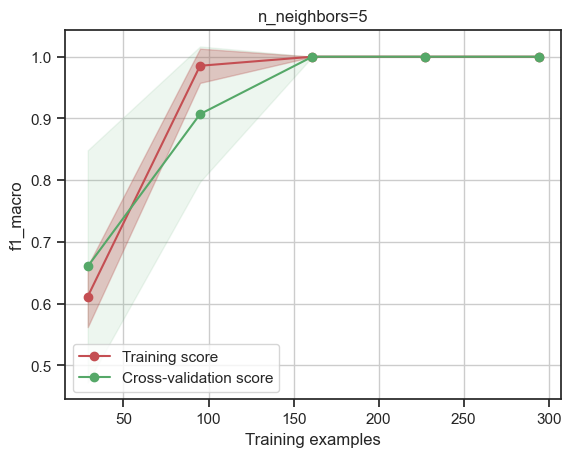

In [139]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    data_x_train, data_y_train, cv=20, scoring='f1_macro')

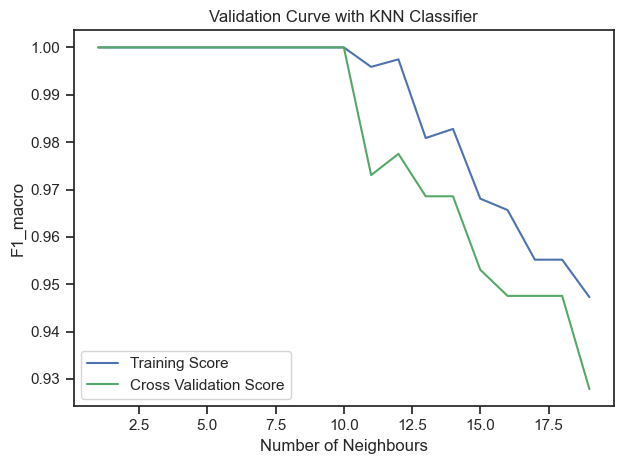

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

data = np.c_[cat_enc_oe[:, 0], cat_enc_oe[:, 1]]
X, y = data, cat_enc_oe[:, 1]

# Define the range for the parameter (e.g., number of neighbors)
parameter_range = np.arange(1, 20, 1)

# Calculate accuracy on training and test set using the parameter with cross-validation
train_score, test_score = validation_curve(
    KNeighborsClassifier(), X, y,
    param_name="n_neighbors",
    param_range=parameter_range,
    cv=15, scoring="f1_macro"
)

# Calculate mean and standard deviation of training and testing scores
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score, label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score, label="Cross Validation Score", color='g')

# Create the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("F1_macro")
plt.tight_layout()
plt.legend(loc='best')
plt.show()